# Árboles de Regresión

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/boston/Boston.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
data.shape

(506, 14)

In [4]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
regtree = DecisionTreeRegressor(min_samples_split=30, min_samples_leaf=10, random_state=0, max_depth=5)

In [28]:
regtree.fit(X, Y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=30,
                      random_state=0)

In [29]:
preds = regtree.predict(data[predictors])

In [30]:
data['preds'] = preds

In [31]:
data[['preds', 'medv']]

,preds,medv
0,23.787500,24.0
1,23.787500,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,23.787500,22.4
502,23.787500,20.6
503,28.978261,23.9
504,31.170000,22.0


In [32]:
from sklearn.tree import plot_tree

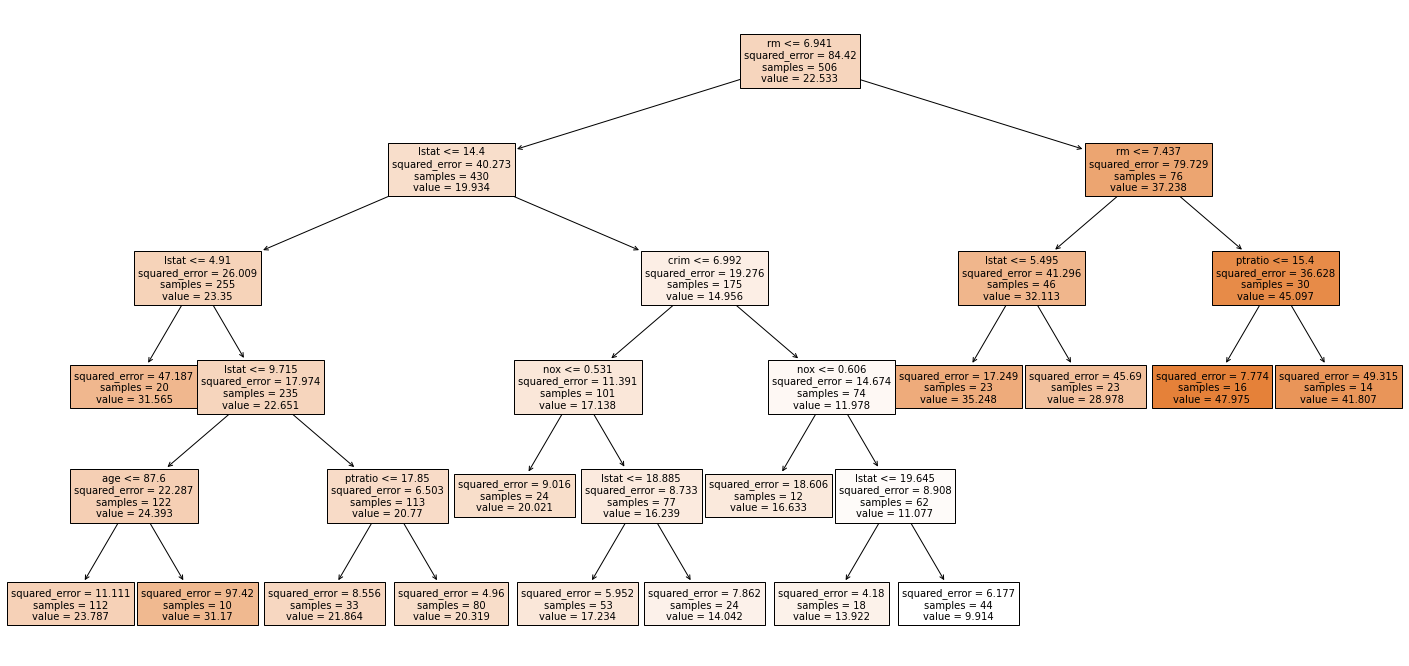

In [44]:
plt.figure(figsize=(25,12))

plot_tree(decision_tree=regtree, feature_names=predictors, filled=True, fontsize=10)

plt.show()

In [36]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [37]:
cv =  KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, scoring='neg_mean_squared_error', cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[-14.21501779 -16.62018743 -18.48312343 -46.22608214 -10.25202434
 -18.39546877 -15.08005674 -32.23929702 -23.04375075 -10.93761052]
-20.54926189262014


In [38]:
feature_importances = list(zip(predictors, regtree.feature_importances_))
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
feature_importances

[('rm', 0.6341876193016562),
 ('lstat', 0.2936467891265104),
 ('crim', 0.032184533425691254),
 ('nox', 0.016195328299152056),
 ('age', 0.014165271650613091),
 ('ptratio', 0.009620458196377114),
 ('zn', 0.0),
 ('indus', 0.0),
 ('chas', 0.0),
 ('dis', 0.0),
 ('rad', 0.0),
 ('tax', 0.0),
 ('black', 0.0)]

# Random Forest - Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
forest = RandomForestRegressor(n_jobs=2, oob_score=True, n_estimators=500)
forest.fit(X, Y)

RandomForestRegressor(n_estimators=500, n_jobs=2, oob_score=True)

In [61]:
data['rforest_pred'] = forest.oob_prediction_
data[['rforest_pred', 'medv']]

,rforest_pred,medv
0,28.163776,24.0
1,23.065922,21.6
2,34.674586,34.7
3,35.018878,33.4
4,34.334392,36.2
...,...,...
501,24.044068,22.4
502,19.619767,20.6
503,27.078571,23.9
504,25.934615,22.0


Error cuadrático medio

In [62]:
data['rforest_error2'] = (data['rforest_pred'] - data['medv'])**2
sum(data['rforest_error2'])/len(data)

10.421478270939126

In [63]:
forest.oob_score_ # Es como el R2 de una regresión

0.876551373337468